### Importing necessary libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 10.7 MB/s eta 0:00:01
  Created wheel for folium: file

### Define Foursquare Credentials

In [2]:
CLIENT_ID = 'J0HTOYKRKKVY40ATW20U000SOEJT5P3YJUKLFCNU2G3T1GI0'
CLIENT_SECRET = 'IOZQVCMK2ROFCHL1SYCYKATKXQMOFS5RQMTHB2TJBZMXYGZB'
ACCESS_TOKEN = 'ORDGFCJHVFJK0DYVNMR0EP301YE4KAZH0FIYZ3D1FJOFYNHW'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: J0HTOYKRKKVY40ATW20U000SOEJT5P3YJUKLFCNU2G3T1GI0
CLIENT_SECRET:IOZQVCMK2ROFCHL1SYCYKATKXQMOFS5RQMTHB2TJBZMXYGZB


In [3]:
address = 'Konak, izmir, TR'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

38.4173469 27.1303546


In [4]:
search_query_p = 'pizza'
radius_p = 2000
print(search_query_p + ' .... OK!')

search_query_b = 'burger'
radius_b = 2000
print(search_query_b + ' .... OK!')

pizza .... OK!
burger .... OK!


In [5]:
url_p = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query_p, radius_p, 100)
print(url_p)

url_b = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query_b, radius_b, 100)
print(url_b)

https://api.foursquare.com/v2/venues/search?client_id=J0HTOYKRKKVY40ATW20U000SOEJT5P3YJUKLFCNU2G3T1GI0&client_secret=IOZQVCMK2ROFCHL1SYCYKATKXQMOFS5RQMTHB2TJBZMXYGZB&ll=38.4173469,27.1303546&oauth_token=ORDGFCJHVFJK0DYVNMR0EP301YE4KAZH0FIYZ3D1FJOFYNHW&v=20180604&query=pizza&radius=2000&limit=100
https://api.foursquare.com/v2/venues/search?client_id=J0HTOYKRKKVY40ATW20U000SOEJT5P3YJUKLFCNU2G3T1GI0&client_secret=IOZQVCMK2ROFCHL1SYCYKATKXQMOFS5RQMTHB2TJBZMXYGZB&ll=38.4173469,27.1303546&oauth_token=ORDGFCJHVFJK0DYVNMR0EP301YE4KAZH0FIYZ3D1FJOFYNHW&v=20180604&query=burger&radius=2000&limit=100


In [6]:
results_p = requests.get(url_p).json()
results_b = requests.get(url_b).json()

In [7]:
# assign relevant part of JSON to venues
venues_p = results_p['response']['venues']
venues_b = results_b['response']['venues']

# tranform venues into a dataframe
dataframe_p = json_normalize(venues_p)

dataframe_b = json_normalize(venues_b)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


### Cleaning Pizza Restaurant Dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_p = ['name', 'categories'] + [col for col in dataframe_p.columns if col.startswith('location.')] + ['id']
dataframe_filtered_p = dataframe_p.loc[:, filtered_columns_p]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_p['categories'] = dataframe_filtered_p.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_p.columns = [column.split('.')[-1] for column in dataframe_filtered_p.columns]

dataframe_filtered_p

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,Pizza Villa,Pizza Place,Konak Mah. 846. Sok. No:5/A,Kemeraltı Şubesi,38.418143,27.130593,"[{'label': 'display', 'lat': 38.41814340648098...",91,35250,TR,Konak,Konak,İzmir,Türkiye,[Konak Mah. 846. Sok. No:5/A (Kemeraltı Şubesi...,50ddad48f2e77b34594b4bcf
1,Palmiye Döner & Pizza,Pizza Place,Fevzipaşa Blv. No:12B,NaN,38.422516,27.132295,"[{'label': 'display', 'lat': 38.42251572886116...",599,35250,TR,NaN,Konak,İzmir,Türkiye,"[Fevzipaşa Blv. No:12B, 35250 izmir]",52c5a1f2498e1db1d503ad49
2,Tadım Pizza,Pizza Place,859 sokak No:4,NaN,38.420868,27.130735,"[{'label': 'display', 'lat': 38.4208681032727,...",393,NaN,TR,NaN,İzmir,İzmir,Türkiye,"[859 sokak No:4, İzmir]",4ef72df69a52c90840ef2fec
3,Piu Pizza,Pizza Place,857 Sokak No:2 Konak,NaN,38.420827,27.130185,"[{'label': 'display', 'lat': 38.4208267644605,...",387,NaN,TR,NaN,İzmir,İzmir,Türkiye,"[857 Sokak No:2 Konak, İzmir]",562e005a498e522c2da4cdba
4,Luciano Pizza & Döner,Café,NaN,NaN,38.420832,27.130486,"[{'label': 'display', 'lat': 38.420832, 'lng':...",388,NaN,TR,NaN,Konak,İzmir,Türkiye,[Konak],5abbaf1cdd8442152333e576
5,Pizza Pizza,Pizza Place,Pasaport,Ataturk Caddesi,38.425643,27.134859,"[{'label': 'display', 'lat': 38.42564284452234...",1003,NaN,TR,NaN,Konak,İzmir,Türkiye,"[Pasaport (Ataturk Caddesi), Konak]",4e673866aeb7e985aaa20240
6,Domino's Pizza,Pizza Place,Hasan Tahsin Cad. No:16/A Hatay,NaN,38.401847,27.115513,"[{'label': 'display', 'lat': 38.40184729867597...",2157,35150,TR,NaN,İzmir,İzmir,Türkiye,"[Hasan Tahsin Cad. No:16/A Hatay, 35150 İzmir]",4d0e1dc13905b1f7a60c9e4b
7,Domino's Pizza,Pizza Place,Pasaport,NaN,38.426528,27.132965,"[{'label': 'display', 'lat': 38.42652828963122...",1047,35220,TR,NaN,Konak,İzmir,Türkiye,"[Pasaport, 35220 İzmir]",4f097346e4b08f5249c71352
8,Domino's Pizza,Pizza Place,Sevgiyolu 1379 Sokak No 57b,NaN,38.426681,27.136868,"[{'label': 'display', 'lat': 38.42668144010907...",1184,NaN,TR,NaN,İzmir,İzmir,Türkiye,"[Sevgiyolu 1379 Sokak No 57b, İzmir]",548ac45d498ecb54daa0e209
9,Pizza Pizza,Pizza Place,İnönü Cd. Üçyol,NaN,38.406203,27.121288,"[{'label': 'display', 'lat': 38.40620290923130...",1471,NaN,TR,NaN,İzmir,İzmir,Türkiye,"[İnönü Cd. Üçyol, İzmir]",4d1355070e9e8eec12a3491c


### Cleaning Burger Restaurant Dataframe

In [9]:
filtered_columns_b = ['name', 'categories'] + [col for col in dataframe_b.columns if col.startswith('location.')] + ['id']
dataframe_filtered_b = dataframe_b.loc[:, filtered_columns_b]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_b['categories'] = dataframe_filtered_b.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_b.columns = [column.split('.')[-1] for column in dataframe_filtered_b.columns]

dataframe_filtered_b

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,neighborhood,crossStreet,id
0,Burger King,Fast Food Restaurant,38.416406,27.128369,"[{'label': 'display', 'lat': 38.41640638763128...",202,35170,TR,İzmir,İzmir,Türkiye,[35170 İzmir],NaN,NaN,NaN,4d08aa4905216dcb0b291cb6
1,Burger King,Fast Food Restaurant,38.422126,27.129206,"[{'label': 'display', 'lat': 38.42212638141188...",541,35250,TR,Konak,İzmir,Türkiye,"[Konak Pier AVM, 35250 Konak]",Konak Pier AVM,NaN,NaN,4d31ba8d5c2db60c58e2ba6c
2,Burger No 7,Burger Joint,38.432755,27.142415,"[{'label': 'display', 'lat': 38.43275505570964...",2012,NaN,TR,İzmir,İzmir,Türkiye,"[1389 Sokak No:7 Alsancak, İzmir]",1389 Sokak No:7 Alsancak,Alsancak,NaN,5a998b1695a7222a9dee972a
3,Burger King,Fast Food Restaurant,38.403354,27.128846,"[{'label': 'display', 'lat': 38.40335362504463...",1563,NaN,TR,İzmir,İzmir,Türkiye,"[İzmir Park, İzmir]",İzmir Park,NaN,NaN,54ca7fb6498e95364d71dce2
4,Burger King,Fast Food Restaurant,38.428603,27.136513,"[{'label': 'display', 'lat': 38.42860259660131...",1363,NaN,TR,Konak,İzmir,Türkiye,[Şehit Nevres Blv. Alsancak (Swissotel Karşısı...,Şehit Nevres Blv. Alsancak,NaN,Swissotel Karşısı,4c1b4c9db4e62d7fbd1cd993
5,Piri Köfte & Burger,Burger Joint,38.433540,27.142247,"[{'label': 'display', 'lat': 38.43353988733736...",2079,NaN,TR,İzmir,İzmir,Türkiye,"[Kültür Mahallesi 1388. Sokak No: 14/A, İzmir]",Kültür Mahallesi 1388. Sokak No: 14/A,NaN,NaN,59c0f6366fd6261e3bd2ee09
6,Burger King Külah Büfe,Ice Cream Shop,38.418335,27.130104,"[{'label': 'display', 'lat': 38.418335, 'lng':...",112,NaN,TR,NaN,NaN,Türkiye,NaN,NaN,NaN,NaN,56966454498e67d80fc3cf9f
7,Mengoli Burgers Steak Fries,Burger Joint,38.425583,27.134979,"[{'label': 'display', 'lat': 38.42558252480487...",1001,NaN,TR,İzmir,İzmir,Türkiye,"[Vali Kazım Dirik Cad. No:34-44A, İzmir]",Vali Kazım Dirik Cad. No:34-44A,NaN,NaN,5a13f65f16fa042ec85a2b2f
8,Burger King Dondurma,Ice Cream Shop,38.418466,27.125840,"[{'label': 'display', 'lat': 38.41846597139359...",412,NaN,TR,NaN,NaN,Türkiye,NaN,NaN,NaN,NaN,53af0cbf498ec433ee90f38a
9,Beeves Burger&Steakhouse,Steakhouse,38.432641,27.140253,"[{'label': 'display', 'lat': 38.432641, 'lng':...",1908,NaN,TR,İzmir,İzmir,Türkiye,[Dr. Mustafa Enver Bey Caddesi NO:9/B Alsancak...,Dr. Mustafa Enver Bey Caddesi NO:9/B Alsancak,Kültür Mahallesi,NaN,56aa11ad498e7e4fd9e27295


### Visualization of Burger Restaurant in "red" and Pizza Restaurant in "blue"

In [10]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the Pizza Restaurent as blue circle markers
for lat, lng, label in zip(dataframe_filtered_p.lat, dataframe_filtered_p.lng, dataframe_filtered_p.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

    # add the Burger Restaurent as red circle markers
for lat, lng, label in zip(dataframe_filtered_b.lat, dataframe_filtered_b.lng, dataframe_filtered_b.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# display map
venues_map

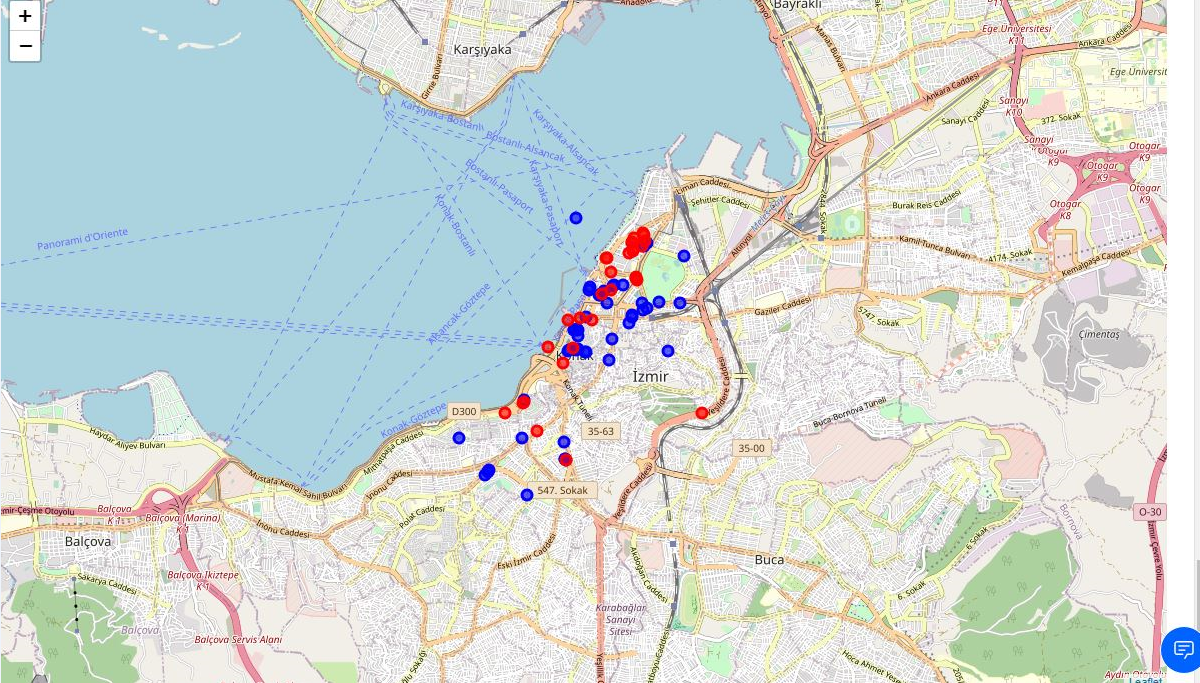

### Bar Chart of Categories of Pizza Provider


Pizza Place             37
Fast Food Restaurant     5
Café                     2
Italian Restaurant       1
Breakfast Spot           1
Moroccan Restaurant      1
Pide Place               1
Hotel                    1
Name: categories, dtype: int64


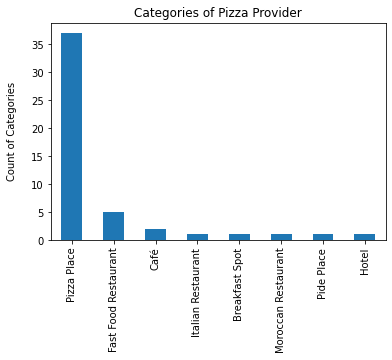

In [36]:
import matplotlib.pyplot as plt 
dataframe_filtered_p['categories'].value_counts().plot(kind='bar');
plt.title("Categories of Pizza Provider")
plt.ylabel("Count of Categories", labelpad=14)

print(dataframe_filtered_p['categories'].value_counts())

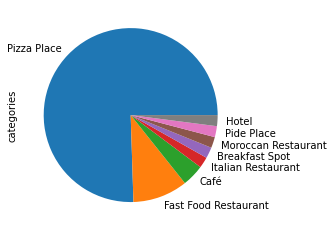

In [30]:
dataframe_filtered_p['categories'].value_counts().plot(kind='pie');

### Bar Chart of Categories of Burger Provider

Burger Joint            17
Fast Food Restaurant     6
Ice Cream Shop           2
Café                     1
Coffee Shop              1
Steakhouse               1
Fried Chicken Joint      1
Chinese Restaurant       1
Name: categories, dtype: int64


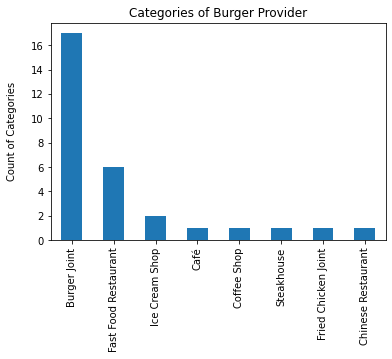

In [37]:
dataframe_filtered_b['categories'].value_counts().plot(kind='bar');
plt.title("Categories of Burger Provider")
plt.ylabel("Count of Categories", labelpad=14)

print(dataframe_filtered_b['categories'].value_counts())

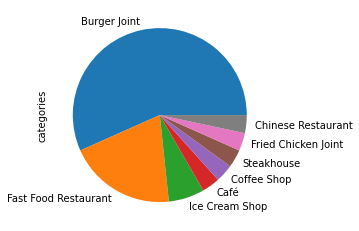

In [26]:
dataframe_filtered_b['categories'].value_counts().plot(kind='pie');

In [42]:
df_p = dataframe_filtered_p[['name', 'categories', 'lat', 'lng']]
df_p.head(5)

,name,categories,lat,lng
0,Pizza Villa,Pizza Place,38.418143,27.130593
1,Palmiye Döner & Pizza,Pizza Place,38.422516,27.132295
2,Tadım Pizza,Pizza Place,38.420868,27.130735
3,Piu Pizza,Pizza Place,38.420827,27.130185
4,Luciano Pizza & Döner,Café,38.420832,27.130486


In [43]:
df_b = dataframe_filtered_b[['name', 'categories', 'lat', 'lng']]
df_b.head(5)

,name,categories,lat,lng
0,Burger King,Fast Food Restaurant,38.416406,27.128369
1,Burger King,Fast Food Restaurant,38.422126,27.129206
2,Burger No 7,Burger Joint,38.432755,27.142415
3,Burger King,Fast Food Restaurant,38.403354,27.128846
4,Burger King,Fast Food Restaurant,38.428603,27.136513
